In [1]:
#Data preprocessing

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
file_path_1=r"C:\Users\nehaa\OneDrive\Desktop\Deakin Uni\T2 2024\Team Project A\Aus_grocery_synthetic_dataset2 1.xlsx"
df1=pd.read_excel(file_path_1)
file_path_2=r"C:\Users\nehaa\OneDrive\Desktop\Deakin Uni\T2 2024\Team Project A\synthethic_time_point.csv"
df2=pd.read_csv(file_path_2,nrows=40000)
'''

In [2]:
#Defining file path for various data available
file_path_1=r"C:\Users\nehaa\OneDrive\Desktop\Deakin Uni\T2 2024\Team Project A\scrapped data\Sun4AugWoolworths.csv"
file_path_2=r"C:\Users\nehaa\OneDrive\Desktop\Deakin Uni\T2 2024\Team Project A\scrapped data\Tue27AugWoolworths.csv"
file_path_3=r"C:\Users\nehaa\OneDrive\Desktop\Deakin Uni\T2 2024\Team Project A\scrapped data\Tue03SepWoolworths.csv"
file_path_4=r"C:\Users\nehaa\OneDrive\Desktop\Deakin Uni\T2 2024\Team Project A\scrapped data\Wed04SepWoolworths.csv"
file_path_5=r"C:\Users\nehaa\OneDrive\Desktop\Deakin Uni\T2 2024\Team Project A\scrapped data\Tue10SepWoolworths.csv"

In [5]:
#Rading each file as pandas dataframe
df1=pd.read_csv(file_path_1)
df1['Date']="2024-08-04"
df2=pd.read_csv(file_path_2)
df2['Date']="2024-08-27"
df3=pd.read_csv(file_path_3)
df3['Date']="2024-09-03"
df4=pd.read_csv(file_path_4)
df4['Date']="2024-09-04"
df5=pd.read_csv(file_path_5)
df5['Date']="2024-09-10"
print("Columns of df1 = ",df1.columns)
print("Columns of df2 = ",df2.columns
print("Columns of df3 = ",df3.columns)
print("Columns of df4 = ",df4.columns)
print("Columns of df5 = ",df5.columns)

Columns of df1 =     Product Code     Category                    Item Name Best Price  \
0        133211  Fruit & Veg       Cavendish Bananas Each      $0.77   
1        134034  Fruit & Veg            Fresh Tomato Each      $0.65   
2        144607  Fruit & Veg     Strawberries 250g Punnet      $4.00   
3        105919  Fruit & Veg  Fresh Pink Lady Apples Each      $0.86   
4        169438  Fruit & Veg          Truss Tomatoes Each      $0.83   

  Best Unit Price Item Price    Unit Price Price Was Special Text  \
0     $0.77 / 1EA      $0.77   $0.77 / 1EA       NaN          NaN   
1     $0.65 / 1EA      $0.65   $0.65 / 1EA       NaN          NaN   
2    $16.00 / 1KG      $4.00  $16.00 / 1KG       NaN          NaN   
3     $0.86 / 1EA      $0.86   $0.86 / 1EA       NaN          NaN   
4     $0.83 / 1EA      $0.83   $0.83 / 1EA       NaN          NaN   

  Complex Promo Text                                               Link  \
0                NaN  https://www.woolworths.com.au/shop/pr

In [6]:
#Merging all the data frames for data preprocessing and modle training
merged_df=pd.concat([df1,df2,df3,df4,df5],axis=0)#Concating along rows as all dataframes have same column names

In [7]:
print(merged_df.columns)

Index(['Product Code', 'Category', 'Item Name', 'Best Price',
       'Best Unit Price', 'Item Price', 'Unit Price', 'Price Was',
       'Special Text', 'Complex Promo Text', 'Link', 'Date'],
      dtype='object')


In [8]:
#Dropping unwanted columns or columns having NAN value
columns_dropped=['Price Was','Special Text','Complex Promo Text','Link']
df=merged_df.drop(columns=columns_dropped)
print(df.columns)

Index(['Product Code', 'Category', 'Item Name', 'Best Price',
       'Best Unit Price', 'Item Price', 'Unit Price', 'Date'],
      dtype='object')


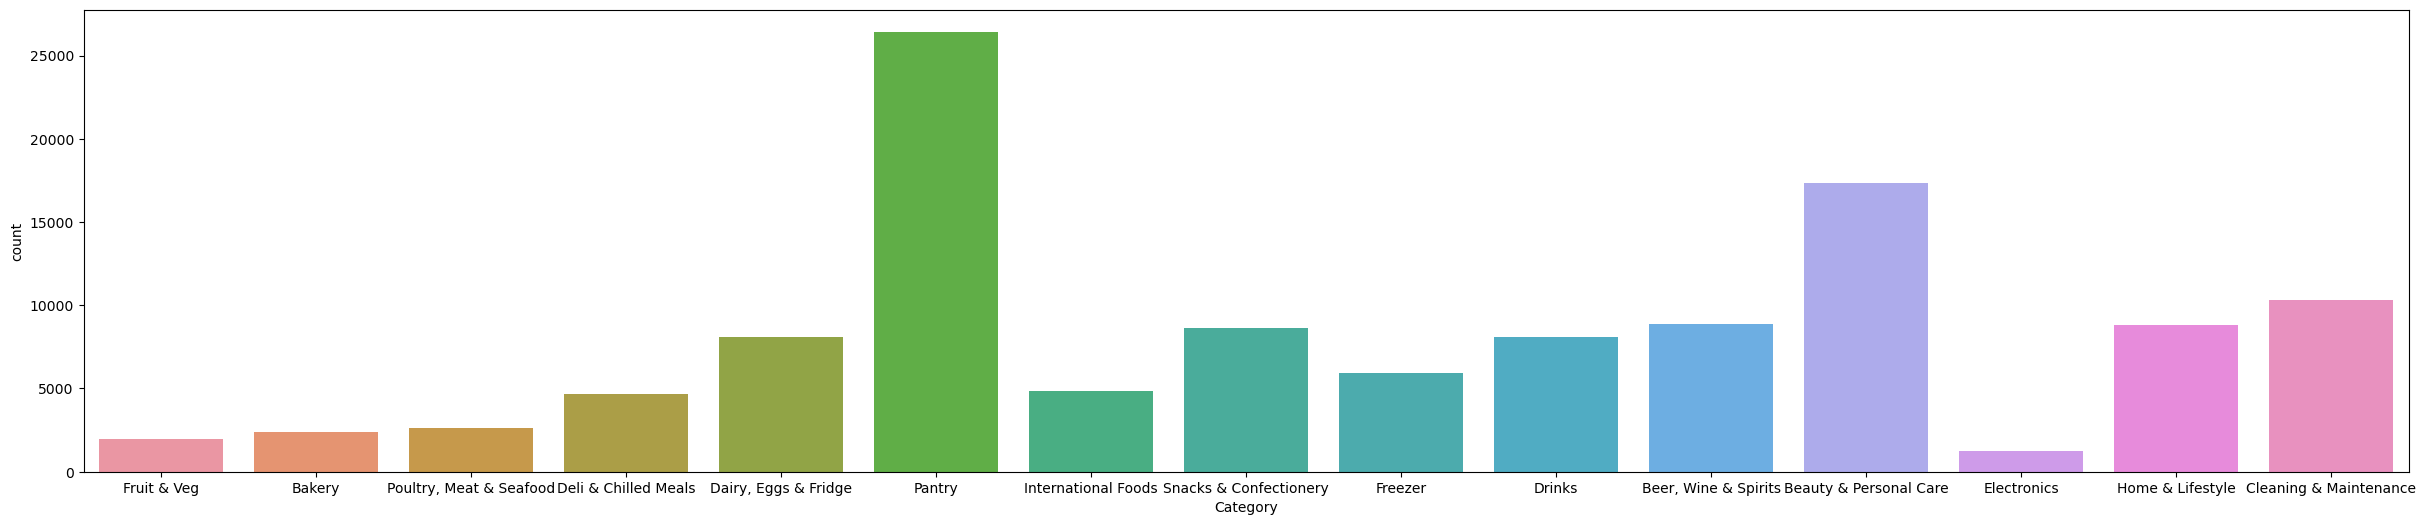

In [11]:
#Bar plots to show frequency of categories
import seaborn as sns

plt.figure(figsize=(30,6))
sns.countplot(x='Category', data=df)
plt.show()

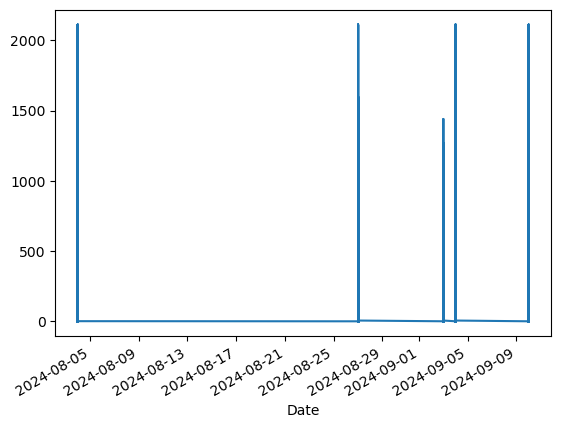

In [25]:
#Visualizing data over time
#First we can make our Unit Price column to float datatype
# Remove '$' if present and also remove unit types like ' / 1EA', ' / 1KG'
# Remove '$', commas, and unit types like ' / 1EA', ' / 1KG'
df.columns = df.columns.str.strip()
df['Unit Price'] = df['Unit Price'].astype(str).fillna('')
df['Unit Price'] = df['Unit Price'].str.replace('$', '', regex=False) \
                                   .str.replace(',', '') \
                                   .str.replace(r' / \d+[A-Z]+', '', regex=True)

# Convert the resulting strings to float
df['Unit Price'] = df['Unit Price'].astype(float)

df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Unit Price'].plot()
plt.show()

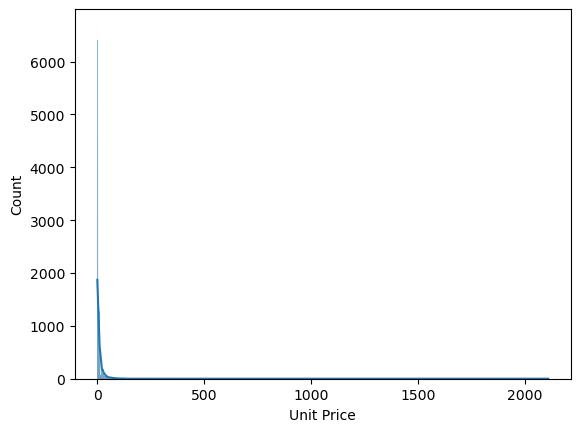

In [27]:
#To visualize the distribution of data
sns.histplot(df['Unit Price'], kde=True)
plt.show()


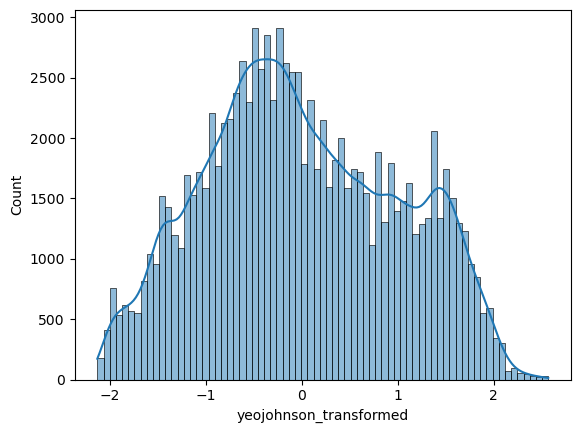

Index(['Product Code', 'Category', 'Item Name', 'Best Price',
       'Best Unit Price', 'Item Price', 'Unit Price',
       'yeojohnson_transformed'],
      dtype='object')


In [29]:
#To normalize data i tried log transformation first as the data was right skewed and then the data becomes left skewed. Hence i decided to use eo-Johnson Transformation.

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['yeojohnson_transformed'] = pt.fit_transform(df[['Unit Price']])

#Again visualizing

sns.histplot(df['yeojohnson_transformed'], kde=True)
plt.show()

print(df.columns)

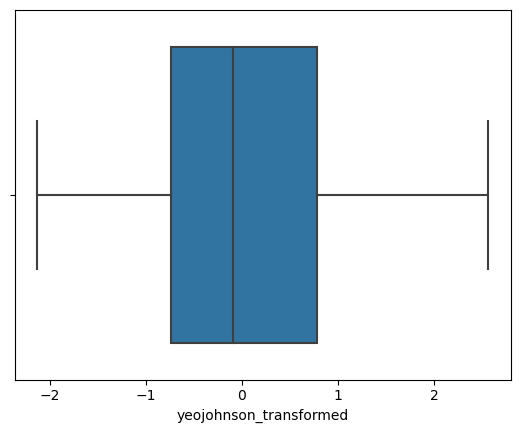

In [30]:
#To find any outliers
sns.boxplot(x=df['yeojohnson_transformed'])
plt.show()

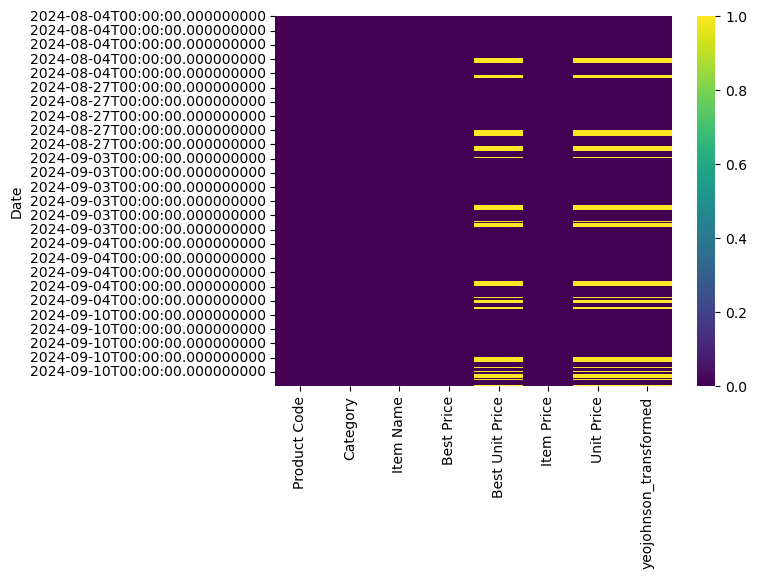

In [31]:
#Dealing with missing values

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.show()

# Prophet Model

Prophet is an open source algorithm developed by facebook's core data science team. it is actually a forecasting tool which works well with seasonal data. I tcan also hadle outliers in a better way.

In [32]:
!pip install prophet


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd
from prophet import Prophet

In [34]:
#For prophet model data should contain two columns ds which is the date and y which we need to predict
df_prophet = df[['yeojohnson_transformed', 'Unit Price']].rename(columns={'yeojohnson_transformed': 'ds', 'Unit Price': 'y'})

In [35]:
# Drop missing values
df_prophet.dropna(inplace=True)

In [36]:
#Split data as train and test datasets
train = df_prophet.iloc[:-365]  # Use all but the last 365 days for training
test = df_prophet.iloc[-365:]   # Use the last 365 days for testing

In [37]:
# Create the model
model = Prophet()

# Fit the model
model.fit(train)

21:58:02 - cmdstanpy - INFO - Chain [1] start processing
21:58:03 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# Create a DataFrame with future dates (e.g., next 10 days)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Extract the predictions corresponding to the test set dates
forecast_test = forecast[-365:]

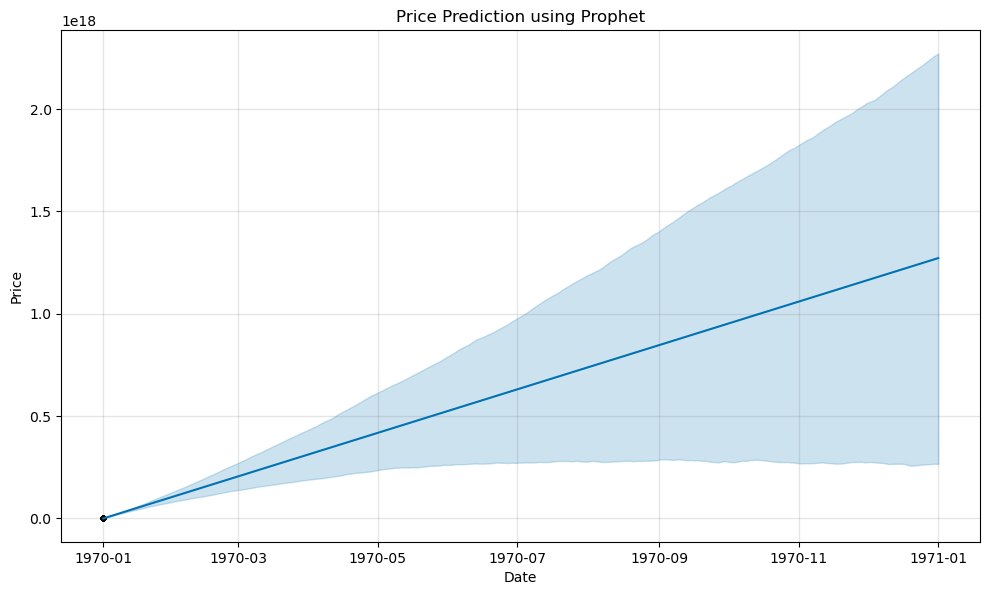

In [46]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Price Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [47]:
#Calculating the accuracy of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(test['y'], forecast_test['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 6.377880552338995e+17
Mean Squared Error (MSE): 5.41623869006736e+35
Root Mean Squared Error (RMSE): 7.359509963351745e+17


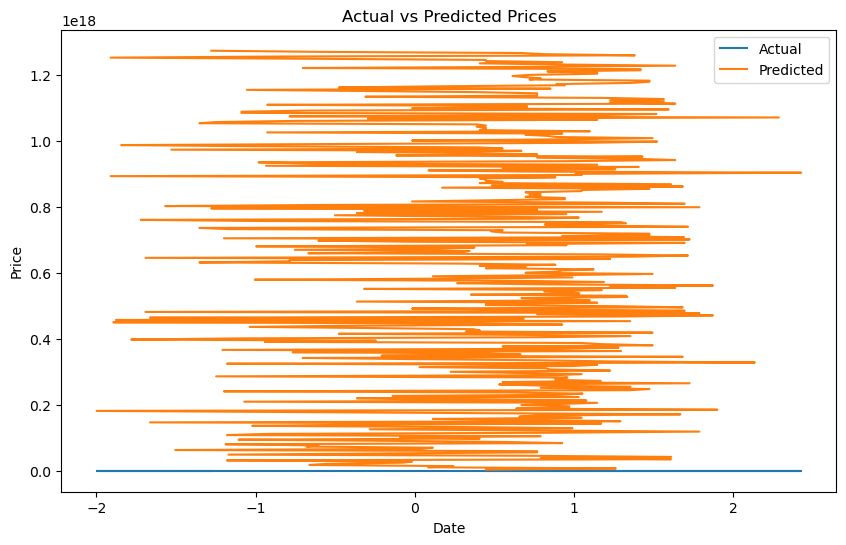

In [41]:
#Visual representation of comparison

plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], forecast_test['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

Our data was just of 5 days and with that we forcasted for next 365 days. As you can see the error is so high. The predicted and actual valued are far apart. With more data we can make the model more accurate and effective.